<a href="https://colab.research.google.com/github/hernansalinas/autogrades/blob/main/Laboratorios_Taller/Lab08_Derivadas_e_integrales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy as sc
import sympy as sp
from scipy.interpolate import lagrange
from scipy import integrate
import math



#Parte 1

En un cirtcuito con un voltaje de  $\varepsilon(t)$ y una inductancia de L, la primera ley de kirshhoff nos da la siguiente relación

\begin{equation}
\varepsilon(t) = L\frac{\mathrm{d}i}{\mathrm{d}t} + Ri
\end{equation}

donde $R$, es la resistencia del ciruito, $I$ es la corriente. Suponga que medimos la corriente con varios valores de $t$ y obtenemos:

``t = 1.00, 1.01, 1.02, 1.03, 1.04``

``i = 3.10, 3.12, 3.14, 3.18, 3.24``


donde $t$ se mide en segundos, $I$ se da en Amperios, la inductancia $L$ es una constante de 0.98 H, la resistencia es de 0.142 $\Omega$. Aproxime el votaje  $\varepsilon(t)$ en los valores t=1.00, 1.01, 1.02, 1.03, 1.04 ,  para ello realice lo siguiente:


- Construya un data frame de pandas con los valores de tiempo y corriente
- Emplee un metodo calcular la derivada numérica.

In [2]:
t = np.array([1.00, 1.01, 1.02, 1.03, 1.04])

i = np.array([3.10, 3.12, 3.14, 3.18, 3.24])

In [3]:
df = pd.DataFrame()
df["Tiempo(s)"] = t
df["Corriente (A)"] = i
df

,Tiempo(s),Corriente (A)
0,1.00,3.10
1,1.01,3.12
2,1.02,3.14
3,1.03,3.18
4,1.04,3.24


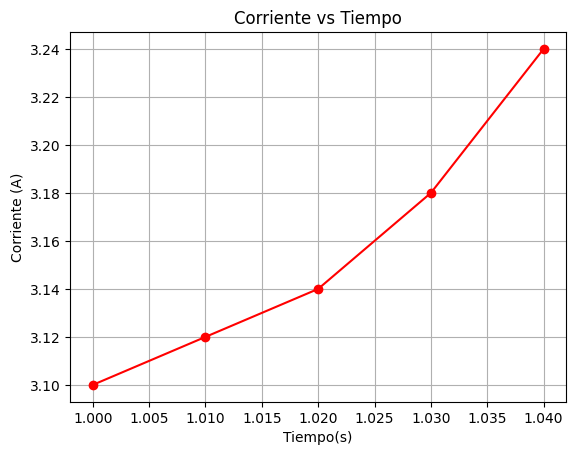

In [4]:
plt.plot(df["Tiempo(s)"],df["Corriente (A)"], "ro-" )
plt.xlabel("Tiempo(s)")
plt.ylabel("Corriente (A)")
plt.title("Corriente vs Tiempo")
plt.grid()

In [5]:
derivada = np.gradient(i,t) #

# di = np.diff(i) diferencia de valores de i
# dt = np.diff(t)
# d=di/dt

In [6]:
L = 0.98

R = 0.142

E_t = L * derivada + R*i

df["fem(v)"] = E_t

df

,Tiempo(s),Corriente (A),fem(v)
0,1.00,3.10,2.40020
1,1.01,3.12,2.40304
2,1.02,3.14,3.38588
3,1.03,3.18,5.35156
4,1.04,3.24,6.34008


Text(0.5, 1.0, 'I vs T')

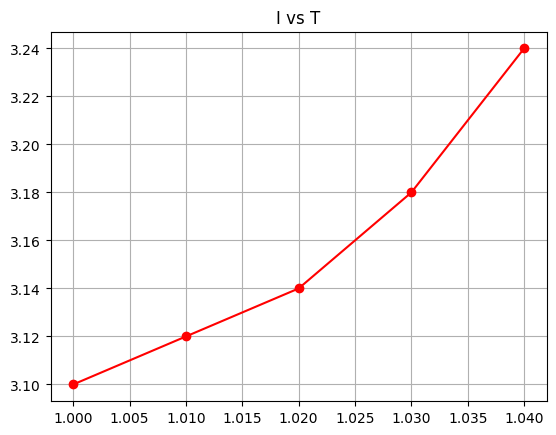

In [7]:
plt.plot(df["Tiempo(s)"],df["Corriente (A)"],"ro-")
plt.grid()
plt.title("I vs T")

In [8]:
# se determina el polinomio de lagrange de la corriente I
pol= lagrange(t,df["Corriente (A)"])

h = 1e-6
x=np.linspace(1,1.04,100)

# el metodo para derivar, los que nos piden

def derivada_I(pol,x,h):
  f_prima = (1 / (2*h)) * ((-3)* pol(x) + 4*pol(x+h)- pol(x + 2*h))
  return f_prima

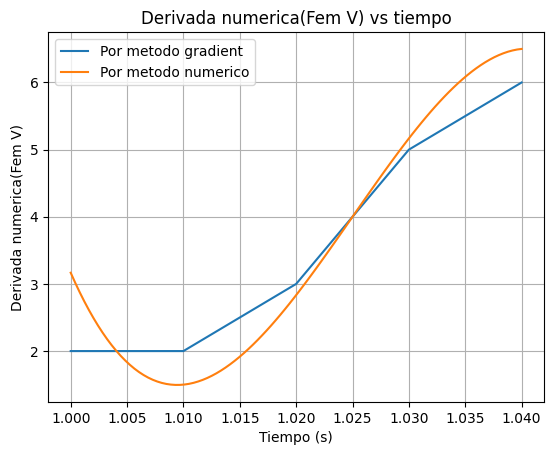

In [9]:
f=derivada_I(pol,x,h)
plt.plot(df["Tiempo(s)"],derivada, label="Por metodo gradient")
plt.xlabel("Tiempo (s)")
plt.ylabel("Derivada numerica(Fem V)")
plt.title("Derivada numerica(Fem V) vs tiempo")
plt.plot(x,f, label="Por metodo numerico")
plt.legend(loc="best")
plt.grid()


##**Parte 2**

1. Escribir en código Markdown la expresión para calcular una integral con la regla del trapecio.

2. Escribir en código Markdown la expresión para calcular una integral con la regla del simpson.

3. Escribir en código Markdown la expresión para calcular una integral con el metodo de cuadratura.

4. Calcular una aproximación con el metodo 1,2,3 de las siguientes integrales

---
a)
$$
 \int_0^{\pi/2} \frac{1}{\sqrt{\tan x}}\mathrm{dx}
 $$

----
b)
$$
 \int_{1}^{\infty} \frac{\cos x}{x^3}\mathrm{dx}
 $$


----
c)
$$
 \int_{0}^{\pi/4} \int_{0}^{\sin x} \frac{1}{\sqrt{1-y^2}}\mathrm{dxdy}
 $$

---

Garantizando  que el error sea menor a $\varepsilon=1\times 10^{-5}$.

**SOLUCION**

1)Escribir en código Markdown la expresión para calcular una integral con la regla del trapecio

---
$$
\int_a^{b}f(x)\mathrm{dx} ≈ (b-a)× \frac{f(b)+f(a)}{2}
 $$

----

El error es: $E=\frac{-1}{12}f^{(2)}(ξ)×(b-a)^3$

2)Escribir en código Markdown la expresión para calcular una integral con la regla del simpson 1/3 compuesta

---
$$
\int_a^{b}f(x)\mathrm{dx} ≈ \frac{b-a}{3n} \times (f(a) + 2\sum_{i=1}^{\frac{n}{2}-1}f(x_ipares) + 4\sum_{i=1}^{\frac{n}{2}}f(x_iimpares)  + f(b))
$$

----


----

3) Escribir en código Markdown la expresión para calcular una integral con el metodo de cuadratura.

---
Se utilizan los polinomios de Legendre obtenidos con la formula de Rodrigues que se expone a continuación:
$$
P_n(x) = \frac{1}{2^n\times n!} × \frac{d^n}{dx^n}[(x^2-1)^n]
$$

Con el polinomio de Legendre se obtienen sus raices xi  y a partir de su derivada una expresión llamada Gauss-Legendre para obtener los pesos wi:
$$
w_i = \frac{2}{(1-x_i^2)(P'(x_i))^2}
$$


Asimismo, con los valores de  xi se puede obtener yi a través de la siguiente parametrizacion_
$$
y_i = \frac{b-a}{2}x_i + \frac{b+a}{2}
$$

Finalmente con wi y yi se puede determinar la integral numerica con la siguiente expresión

$$
\int_a^{b}f(x)\mathrm{dx} ≈\frac{b-a}{2}×\sum_{i=1}^{n}w_{i}f(y_i)
$$

----

4)Calcular una aproximación con el metodo 1,2,3 de las siguientes integrales

Metodo del trapecio para la integral: $$
 \int_0^{\pi/2} \frac{1}{\sqrt{\tan x}}\mathrm{dx}
 $$


In [10]:
fun = lambda x : 1 / ((np.tan(x))**0.5)
a = 1e-9

b = np.pi/2

n = 1000000


x_ = np.linspace(a,b,n)

def integral_trapa(f,a,b,n,x):
  suma = 0
  for i in range(1,n,1):
    suma = suma + f(x_[i])

  inte = ((b-a)/(2*n))* (f(a) + f(b) + 2*suma)
  return inte

In [11]:
i= integral_trapa(fun,a,b,n,x_)

# se usa el metodo predeterminado por python
it= integrate.trapezoid(fun(x_),x_)
error = abs(i-it)
print("El valor de la integral por metodo de trapecio que yo hice es ", round(i,8))
print("El valor de la integral por metodo de trapecio por integrate.trapezoid es ", round(it,8))
print("El error  es ", error,"mucho menor que epsilon=1E-5")

El valor de la integral por metodo de trapecio que yo hice es  2.24444439
El valor de la integral por metodo de trapecio por integrate.trapezoid es  2.24444664
El error  es  2.2444466614146563e-06 mucho menor que epsilon=1E-5


Metodo de la regla de Simpson para la integral:
$$
 \int_0^{\pi/2} \frac{1}{\sqrt{\tan x}}\mathrm{dx}
 $$


In [12]:
def integral_simpson(fun,a,b,n):
  h=(b-a)/n
  xs = np.arange(a,b,h)
  xs_pares = xs[2: :2]
  xs_impares =xs[1 : :2]
  i = (h/3) * (fun(a) + 2*np.sum(fun(xs_pares)) + 4*np.sum(fun(xs_impares)) + fun(b))
  return i


In [13]:
intsimp =integral_simpson(fun,a,b,1000000)

In [14]:
# se usa el metodo predeterminado por python
iss= integrate.simpson(fun(x_),x_)
errors = abs(intsimp -iss)
print("El valor de la integral por metodo de simpson que yo hice es ", round(intsimp,14))
print("El valor de la integral por metodo integrate.simpson  es ", round(iss,14))
print("El error es ", errors,"mucho menor que epsilon=1E-5")

El valor de la integral por metodo de simpson que yo hice es  2.23642039878171
El valor de la integral por metodo integrate.simpson  es  2.2364204144765
El error es  1.5694791244413864e-08 mucho menor que epsilon=1E-5


Metodo de la cuadratura para la integral:
$$
 \int_0^{\pi/2} \frac{1}{\sqrt{\tan x}}\mathrm{dx}
 $$





In [15]:
# polinomio de legendre y sus raices
# El codigo puede demorar un poco en cargar

def pol_legendre(n):
  x = sp.symbols("x")
  multi = 1 / ((2**n)*sp.factorial(n))
  f = (x**2-1)**n
  derivada_expr = sp.diff(f, 'x',n)
  pol = multi* derivada_expr
  return pol

# polinomio grado n
pol=pol_legendre(50)


print(f"El polinomio de legendre es ",pol)
raices = sp.solve(pol, sp.symbols("x"))
raices= np.array([float(raiz) for raiz in raices])
#print("Sus raices son ", raices)

El polinomio de legendre es  (140737488355328*x**50 + 86201711617638400*x**48*(x**2 - 1) + 12154441338087014400*x**46*(x**2 - 1)**2 + 698880376940003328000*x**44*(x**2 - 1)**3 + 20660651143288848384000*x**42*(x**2 - 1)**4 + 355776412687433969172480*x**40*(x**2 - 1)**5 + 3854244470780534666035200*x**38*(x**2 - 1)**6 + 27648304724068529287987200*x**36*(x**2 - 1)**7 + 136081499813774792589312000*x**34*(x**2 - 1)**8 + 471245193799553448411136000*x**32*(x**2 - 1)**9 + 1168688080622892552059617280*x**30*(x**2 - 1)**10 + 2100740971367596116305510400*x**28*(x**2 - 1)**11 + 2757222524919969902650982400*x**26*(x**2 - 1)**12 + 2651175504730740291010560000*x**24*(x**2 - 1)**13 + 1866643977820623266119680000*x**22*(x**2 - 1)**14 + 958210575281253276608102400*x**20*(x**2 - 1)**15 + 355585955670777583116288000*x**18*(x**2 - 1)**16 + 94125694148147007295488000*x**16*(x**2 - 1)**17 + 17430684101508705054720000*x**14*(x**2 - 1)**18 + 2196942178999019612160000*x**12*(x**2 - 1)**19 + 181247729767419118003

In [16]:
derivada_pol = sp.diff(pol,'x')
#print("La derivada del polinoio de Legendre es", derivada_pol)

In [17]:
# convierto la derivada a numpy
x = sp.symbols("x")
d2= sp.lambdify(x,derivada_pol, 'numpy')

# aplica la formula de Gauss-Legendre para optener los pesos
w=np.zeros_like(raices)
def pesos(raices,derivada):
  for i in range(len(w)):
    w[i] = 2/ ((d2(raices[i]))**2 * (1-(raices[i])**2))
  return w

w = pesos(raices,derivada)
#print("Los pesos son ", w)


In [18]:
# se obtienen los yi
b=np.pi/2
a =0
ys = ((b-a)/2)*raices + ((b+a)/2)

In [19]:
# aplico la sumatoria para hallarla integral
fs = np.array([fun(ys[i]) for i in range(len(raices))])
integral_cuad= (np.sum(fs*w))*(b-a)/2


print("El valor de la integral por el metodo de cuadratura yo hice es ", integral_cuad)
print("El valor de la integral por metodo de cuadratura establecido en python es ",integrate.quad(fun,0,np.pi/2)[0])
print("La diferencia entre los dos es ", abs(integral_cuad -integrate.quad(fun,0,np.pi/2)[0]))
print("Si se requiere mayor exactitud se debe aumentar el n del polinomio de legendre pero demora en cargar")

El valor de la integral por el metodo de cuadratura yo hice es  2.199834019179996
El valor de la integral por metodo de cuadratura establecido en python es  2.2214414690792026
La diferencia entre los dos es  0.02160744989920671
Si se requiere mayor exactitud se debe aumentar el n del polinomio de legendre pero demora en cargar


Integral de
$$
 \int_{1}^{\infty} \frac{\cos x}{x^3}\mathrm{dx}
 $$
 por metodo del trapecio


In [20]:
fun2 = lambda x : (np.cos(x)) / (x**3)
a = 1

b = 1e2

n = 100000


x_ = np.linspace(a,b,n)


In [21]:
from scipy import integrate
i= integral_trapa(fun2,a,b,n,x_)

# se usa el metodo predeterminado por python
it= integrate.trapezoid(fun2(x_),x_)
error = abs(i-it)
print("El valor de la integral por metodo de trapecio es ", round(i,14))
print("El valor de la integral usando integrate.trapezoid  es ", round(it,14))
print("Ls diferencia entre los valores, osea el error  es ", error,", mucho menor que epsilon=1E-5")

El valor de la integral por metodo de trapecio es  0.01811711120223
El valor de la integral usando integrate.trapezoid  es  0.01811729152145
Ls diferencia entre los valores, osea el error  es  1.8031921960107167e-07 , mucho menor que epsilon=1E-5


In [22]:
from sympy import pi, oo, tan, symbols, integrate

In [23]:
# comparacion con el valor obtenido con symbol
x2 = sp.symbols("x2")
f2 = sp.cos(x2) / (x2**3)
I = integrate(f2,(x2,1,oo)).evalf()
print("La integral obtenida  con symbol  es ", I)
print("La diferencia del valor obtenido con la  funcion que yo hice, con respecto a la integral calculada con symbol es ", abs(i-I))

La integral obtenida  con symbol  es  0.0181176219806057
La diferencia del valor obtenido con la  funcion que yo hice, con respecto a la integral calculada con symbol es  5.10778376816567e-7


Integral de
$$
 \int_{1}^{\infty} \frac{\cos x}{x^3}\mathrm{dx}
 $$
 por metodo simpson

In [24]:
from scipy import integrate
is2 = integral_simpson(fun2,a,b,n)
iss2 = integrate.simpson(fun2(x_),x_)
print("El valor de la integral por metodo de simpson que hice es ", round(is2,14))
print("El valor de la integral usando integrate.simpson  es ", round(iss2,14))
print("Ls diferencia entre los valores, osea el error  es ", error,", mucho menor que epsilon=1E-5")

El valor de la integral por metodo de simpson que hice es  0.01811709040305
El valor de la integral usando integrate.simpson  es  0.01811709040305
Ls diferencia entre los valores, osea el error  es  1.8031921960107167e-07 , mucho menor que epsilon=1E-5


Integral de
$$
 \int_{1}^{\infty} \frac{\cos x}{x^3}\mathrm{dx}
 $$
 por metodo de la cuadratura

In [25]:
iq = integrate.quad(fun2,1,100)[0]
print("El valor de la integral por metodo de cuadratura integrate.quad es ", iq)
print("El valor de la integral con symbol es ", I)
print(" El error es ",abs(iq-I), "mucho menor que 1e-5")

El valor de la integral por metodo de cuadratura integrate.quad es  0.01811709040274776
El valor de la integral con symbol es  0.0181176219806057
 El error es  5.31577857912358e-7 mucho menor que 1e-5


La integral de
$$
 \int_{0}^{\pi/4} \int_{0}^{\sin x} \frac{1}{\sqrt{1-y^2}}\mathrm{dydx}
 $$

In [26]:
from sympy import pi, oo, tan, symbols, integrate
y = symbols("y")

f3 = 1 / sp.sqrt(1-(y**2))
I = integrate(f3, (y,0,sp.sin(x))).evalf()  #se evalua primero la parte de dy, porque simbolicamente el resultado esuna función que dependerá de x
II = integrate(I,(x,0, pi/4)).evalf()  #se evalua la función resultante de la integración anterioir en los limites de la variable x
print("El valor de la integral doble es", II)

El valor de la integral doble es 0.308425137534042


## Parte 3

Un péndulo físico en el regimen de pequeñas oscilaciones tiene un periodo de:

\begin{equation}
P_0=2\pi \sqrt{\frac{I_0}{mgb}}
\end{equation}

Cuando las oscilaciones no son pequeñas, podemos encontrar una expresión para el periodo como sigue:


La energia de un péndulo físico viene dada por:

\begin{equation}
E=\frac{I_0\omega^2}{2}+mgb(1-\cos \theta)
\end{equation}

En el punto más alejado de su posición de equilibrio, su energía es solo potencial y viene dada por:

\begin{equation}
Ep = mgb(1-\cos \theta),
\end{equation}

Igualando ambas expresiones tenemos que:

\begin{equation}
mgb(1-\cos \theta)=\frac{I_0\omega^2}{2}+mgb(1-\cos \theta)
\end{equation}

Integrando la ecuación respecto a $\theta$ y realizando la sustitución:

$\sin \phi = \frac{\sin \frac{\theta}{2}}{\sin \frac{\theta_0}{2}}$ y  $k = \sin \frac{\theta_0}{2}$, se puede encontrar  que el periodo de oscilación, viene dado en terminos de  la integral elíptica completa de primera especie:


\begin{equation}
P = \frac{2P_0}{\pi} \int _0^{\pi/2} \frac{\mathrm{d\phi}}{\sqrt{1-k^2\sin^2\phi}}
\end{equation}

donde,  $P_0$ es el periodo de las oscilaciones pequeñas.

Determinar el periodo de oscilación de un péndulo. Para ello:

1. Suponga los párametros iniciales del pendulo.
2. Realice una buena planificación del código para calcular la integral.
3. Emplee un  método de integracion numérico que conozca.
4. Compruebe su solucion con el valor exacto de la integral mostrado en el punto

Suponga los párametros iniciales del pendulo.

In [27]:
"""Parametros iniciales"""
#Momento de inercia con unidades de kg*m**2
I0 = 0.5

m = 1
g = 9.8

# b es la distancia del eje de rortación hasta el centro de gravedad  en metros
b=1

# theta_0  es el angulo inicial de donde comienza el movimeinto en radianes
theta_0 = np.pi/6

In [28]:
#calculo de P0 y valor de k
P0 = 2 *np.pi * ((I0/(m*g*b))**0.5)
k = np.sin((theta_0)/2)

In [29]:
from scipy import integrate

In [30]:
# se determina P, primero se halla la integral:
""" primero defino la funcion"""
f = lambda theta: 1 / (1- (k**2) * ((np.sin(theta))**2))

""" luego su dominio entre 0 y pi/2"""
theta = np.linspace(1e-6,np.pi/2,100)

""" integral por la funcion que defini como integral_trapa"""
integral_metodo =integrate.trapezoid(f(theta),theta)
periodo_metodo = integral_metodo * (2 * P0 / np.pi)
print("El periodo es ", periodo_metodo,"segundos")


El periodo es  1.46929089559816 segundos


## Parte 4

The next  problems are examples of how elliptic integrals enter into realistic physics problems. It is straightforward to evaluate any integral numerically using the techniques of this chapter, but it may be difficult for you to  know if the answers you obtain are correct. One way to hone your integral evaluating skills is to compare your answers from quadrature to power series
expressions, or to a polynomial approximations of know precision. To help you in this regard, we present here a polynomial approximation for an elliptic integral (Abramowitz and Stegun, 1972):

\begin{equation}
K(m)=\int_{0}^{\pi/2} \frac{\mathrm{d\phi}}{\sqrt{1-m\sin^2\phi}}
\end{equation}

\begin{equation}
\approx a_0+a_1m_1+a_2(m_1^2) +[ b_0+b_1m_1+b_2m_1^2]\ln(\frac{1}{m_1}) + \epsilon(m)
\end{equation}


* $m_1 = 1-m$,

* $ 0 \le m \le1 $

* $\epsilon(m)\leq 3\times 10^{-5}$

* $a_0 = 1.3862944$

* $b_0 = 0.5$

* $a_1 = 0.1119723$

* $b_1 = 0.1213478$

* $a_2 = 0.00725296$

* $b_2 = 0.0288729$

In [31]:
m1 = 1-(k**2)
a0 = 1.3862944
b0 = 0.5
a1 = 0.1119723
b1 = 0.1213478
a2 = 0.00725296
b2 = 0.0288729
e = 3e-5

Km = a0 + a1*m1 + (a2*((m1)**2)) + (b0 + b1*m1 + (b2*(m1**2)))*np.log(1/m1) + e
 # se multiplica por 2P0/pi

P = (2 * P0 / np.pi) * Km
# se compara con el valor obtenido en el anterior resultado:
print("El periodo obtenido con ese polinomio es ",round(P,3), "segundos")
diferencia = abs(periodo_metodo - P)
print("La diferencia entre los periodos obtenidos con el polinomio y con el metodo del trapecio es  ", round(diferencia,3),"segundos")


El periodo obtenido con ese polinomio es  1.393 segundos
La diferencia entre los periodos obtenidos con el polinomio y con el metodo del trapecio es   0.077 segundos


## Parte 5 (Opcional)

Figure 5.7 shows a current loop of radius a carrying a current I. The point P
is a distance r from the center of the loop with spherical coordinates (r, θ, φ).
Jackson (1988) solves for the φ component of the vector potential at point P
in terms of elliptic integrals:

\begin{equation}
A_{\phi}(r, \theta)=\frac{\mu_0}{4\pi}\frac{4Ia}{\sqrt{a^2+r^2+2ar\sin \theta}}\left(\frac{(2-k^2)K(k)-2E(k)}{k^2} \right)
\end{equation}


where

\begin{equation}
K(k)=\int_{0}^{\pi/2} \frac{\mathrm{d\phi}}{\sqrt{1-k^2\sin^2\phi}}
\end{equation}


\begin{equation}
E(k)=\int_{0}^{\pi/2} \mathrm{d\phi} \sqrt{1-k^2\sin^2\phi}
\end{equation}


\begin{equation}
k^2=\frac{4ar\sin\theta}{a^2+r^2+2ar\sin\theta}
\end{equation}



Here K(k) is a complete elliptic integral of the first kind and E(k) is a complete
elliptic integral of the second kind. For a = 1, I = 3, and μ0∕4π = 1, compute
and plot

a) Aφ(r = 1.1, θ) vs. θ

b) Aφ(r, θ = π∕3) vs. r